In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np

In [18]:
import sys
sys.path.append('../')
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [3]:
list(os.walk('..'))

[('..',
  ['nn_train',
   '__pycache__',
   'Test',
   'model_metrics',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../nn_train',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_11_first_layer_tests.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_14_first_3_layers_25_best_other_fit_methods.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetwork_5.ipynb',
   'NeuralNetwork_9_and_min_max_all_emotions.ipynb',
   'NeuralNetwork_12_first_2_layers_tests.ipynb',
   'NeuralNetwork_13_first_3_layers_tests.ipynb']),
 ('../nn_train/__pycache__',
  [],
  ['neural_network.cpython-38.pyc',
   'tools.cpython-38.pyc

In [4]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [5]:
df = pd.DataFrame()

In [6]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [7]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.9878594,0.003336495,0.008397053,0.001824096,0.007600656,6.9452e-05,0.000141165,-0.005060558,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.9878824,0.003385304,0.008362157,0.001782566,0.007644675,8.0761e-05,0.000138702,-0.004976853,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.9879055,0.003434114,0.008327262,0.001741036,0.007688694,9.207e-05,0.00013624,-0.004893148,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.9879286,0.003482923,0.008292366,0.001699506,0.007732714,0.000103379,0.000133777,-0.004809443,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.9880258,0.003506238,0.008183754,0.00164466,0.00778434,0.000113112,0.000130297,-0.004677515,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.9315634,3.7894e-05,0.02397099,0.06796286,0.02635098,0.000250268,0.000691861,-0.06792496,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.9356429,3.1707e-05,0.0237766,0.06259692,0.02374056,0.000229404,0.000798602,-0.06256521,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.9384109,2.6894e-05,0.023437,0.05935737,0.02117987,0.000212627,0.000848645,-0.05933048,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.9407817,2.3125e-05,0.02303489,0.05651735,0.01901644,0.000197417,0.000877875,-0.05649422,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [8]:
tools.make_valid_df(df, tools.fields)

In [9]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [10]:
df_train, df_other = tools.groupby(df, other=True)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:01:51.600_Смолин Александр_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:00:12.400_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,0.00,0.25
00:00:03.700_Бондаренко Денис_2,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:37.600_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.0,-0.00,0.25
00:01:47.500_Смолин Александр_1,0.99,0.00,0.01,0.01,0.01,0.0,0.0,-0.01,0.25
...,...,...,...,...,...,...,...,...,...
00:00:17.500_Смолин Александр_1,0.02,0.96,0.00,0.00,0.00,0.0,0.0,0.96,0.90
00:00:20.900_Aleksashina_1,0.01,0.98,0.00,0.00,0.00,0.0,0.0,0.97,0.67
00:00:16.900_Смолин Александр_1,0.02,0.97,0.00,0.00,0.00,0.0,0.0,0.97,0.87


In [11]:
df_other

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.030_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.060_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.090_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.121_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
00:00:00.151_Керов Андрей_3,0.99,0.00,0.0,0.0,0.01,0.0,0.0,-0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:11.666_Fomin_6,0.05,0.93,0.0,0.0,0.00,0.0,0.0,0.93,0.78
00:00:04.030_Керов Андрей_2,0.04,0.94,0.0,0.0,0.00,0.0,0.0,0.94,0.53
00:00:11.909_Fomin_6,0.03,0.95,0.0,0.0,0.00,0.0,0.0,0.95,0.83


In [12]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [13]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [14]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [15]:
tools.make_valid_df(df_clear, fields)

In [16]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [17]:
df_clear = df_clear[fields]

In [18]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [19]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [20]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [21]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:08.272_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.25
00:00:47.000_Куликов Алексей_1,0.22,0.00,0.03,0.00,0.56,0.00,0.00,-0.03,0.74
00:00:56.200_Левандовский Кирилл_1,0.75,0.01,0.12,0.20,0.00,0.02,0.01,-0.23,0.31
00:00:08.272_Korsakov_5,0.36,0.00,0.00,0.01,0.69,0.00,0.00,-0.01,0.73
00:00:03.100_Боим_6,0.89,0.00,0.00,0.00,0.16,0.00,0.00,-0.00,0.45
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [22]:
df_test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.666_Korsakov_9,0.98,0.00,0.00,0.02,0.01,0.00,0.00,-0.02,0.41
00:00:02.363_Fomin_4,0.95,0.01,0.02,0.04,0.01,0.00,0.00,-0.04,0.25
00:00:00.121_Korsakov_6,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.26
00:00:10.969_Korsakov_8,0.77,0.00,0.04,0.09,0.00,0.00,0.00,-0.12,0.44
00:00:02.030_Керов Андрей_2,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.25
...,...,...,...,...,...,...,...,...,...
00:00:10.242_Керов Андрей_3,0.95,0.01,0.01,0.02,0.03,0.00,0.00,-0.02,0.31
00:00:55.400_Лебедев Андрей_1,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.25
00:00:09.575_Korsakov_5,0.38,0.00,0.00,0.01,0.66,0.00,0.00,-0.01,0.70


In [23]:
from keras.models import Model
from keras.layers import Input, Dense

In [24]:
models = []

In [25]:
a = Input(shape=(2,))
b = Dense(7, activation='sigmoid')(a)
model = Model(inputs=a, outputs=b)
model.compile(optimizer='adam', loss='mse')

In [26]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [27]:
nn.fit(df_train, epochs=30, batch_size=20)

Epoch 1/30
916/916 [==============================] - 2s 1ms/step - loss: 0.1145
Epoch 2/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0472
Epoch 3/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0304
Epoch 4/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0237
Epoch 5/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0200
Epoch 6/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0176
Epoch 7/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0160
Epoch 8/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 9/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 10/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0135
Epoch 11/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0130
Epoch 12/30
916/916 [==============================] - 1s 1ms/step - loss: 0.0127
Epoch 13/30
916/916 [====

In [28]:
models.append(['0', 0, nn])

In [29]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [30]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [31]:
entry_dict = {'model': models[0][0], 'layer': 'first', 'N': 0}
entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
df_metrics = df_metrics.append(entry_dict, ignore_index = True)

In [32]:
# df_metrics.insert(2, 'N', ['0'] * len(df_metrics))

In [33]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [34]:
statistics = models[0][2].statistics(test)
statistics

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.67558,0.783714,-0.525472,0.085188,-0.787985,0.16876,-0.568479,0.657417,-0.906051,0.125682,-0.543829,0.018526,-0.671963,0.419812


In [35]:
np.absolute(statistics.values).mean()

0.4956042

In [36]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604


### Следующие модели

In [37]:
list(range(2, 10))

[2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
len(models)

1

In [39]:
d = {'1': '2', '3': '4'}
print(d)

{'1': '2', '3': '4'}


In [40]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [41]:
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:08.272_Fomin_3,0.99,0.00,0.01,0.01,0.01,0.00,0.00,-0.01,0.25
00:00:47.000_Куликов Алексей_1,0.22,0.00,0.03,0.00,0.56,0.00,0.00,-0.03,0.74
00:00:56.200_Левандовский Кирилл_1,0.75,0.01,0.12,0.20,0.00,0.02,0.01,-0.23,0.31
00:00:08.272_Korsakov_5,0.36,0.00,0.00,0.01,0.69,0.00,0.00,-0.01,0.73
00:00:03.100_Боим_6,0.89,0.00,0.00,0.00,0.16,0.00,0.00,-0.00,0.45
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.00,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.00,0.99,-0.99,0.62


In [42]:
for i in range(2, 10):
    a = Input(shape=(2,))
    first = Dense(i, activation='relu')(a)
    b = Dense(7, activation='sigmoid')(first)
    model = Model(inputs=a, outputs=b)
    model.compile(optimizer='adam', loss='mse')
    nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
    models.append([str(i), i, nn])
    print('fit', models[-1][0])
    nn.fit(df_train, epochs=20, batch_size=20)
    entry_dict = {'model': models[-1][0], 'layer': 'first', 'N': i}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

fit 2


/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/nn_train/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


Epoch 1/20
916/916 [==============================] - 2s 1ms/step - loss: 0.0753
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0313
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0274
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0216
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0187
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0174
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0165
Epoch 8/20
916/916 [==============================] - 1s 2ms/step - loss: 0.0153
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0130
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0105
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0091
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 13/20
916/916 [====

916/916 [==============================] - 1s 1ms/step - loss: 0.0073
Epoch 16/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 17/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 18/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0072
Epoch 19/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
Epoch 20/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0071
{'model': '6', 'layer': 'first', 'N': 6, 'mean': 0.06449950492815111, 'norm': 0.17456345651776173, 'stat': 0.49067256}
fit 7
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0659
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0217
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0120
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0088
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - los

In [47]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [48]:
len(models)

9

In [49]:
from itertools import chain

In [50]:
# columns = [['min_' + emotion, 'max_' + emotion]
#                    for emotion in seven_fields]
# columns = list(chain.from_iterable(columns))
# columns

In [49]:
# def statistics_v2(self, test, with_mean=False):      
#     diff = self.get_diff(test)
#     assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
#         for i, column in enumerate(diff.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted'] 
#     columns = [['min_' + emotion, 'max_' + emotion]
#                for emotion in diff.columns]
#     columns = list(chain.from_iterable(columns))
#     if with_mean: # insert mean
#         for i in range(len(diff.columns)):
#             columns.insert(2 + 3 * i, 'mean_abs_' + self.df_y.columns[i])
#     statistics_df = pd.DataFrame(columns=columns)
#     entry_dict = {}
#     for emotion in diff.columns:
#         entry_dict['min_' + emotion] = np.min(diff[emotion])
#         entry_dict['max_' + emotion] = np.max(diff[emotion])
#         if with_mean: 
#             entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
#     statistics_df = statistics_df.append(entry_dict, ignore_index = True)
#     return statistics_df

In [50]:
# def stat_v2(self, test, type_):
#     if type_ == 'stat':
#         stat = statistics_v2(self, test)
#         vector = np.absolute(stat.values)
#         return vector.mean()
#     elif type_ == 'stat_mean':
#         stat = statistics_v2(self, test, with_mean=True)
#         vector = np.absolute(stat.values)
#         return vector.mean()

In [51]:
# for i in range(9):
#     df_metrics.at[i, 'stat'] = stat_v2(models[i][2], df_clear, type_='stat')

In [51]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [52]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [53]:
df_clear.sort_values('Disgusted')[-10:].mean()['Disgusted']

0.982

In [54]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [55]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

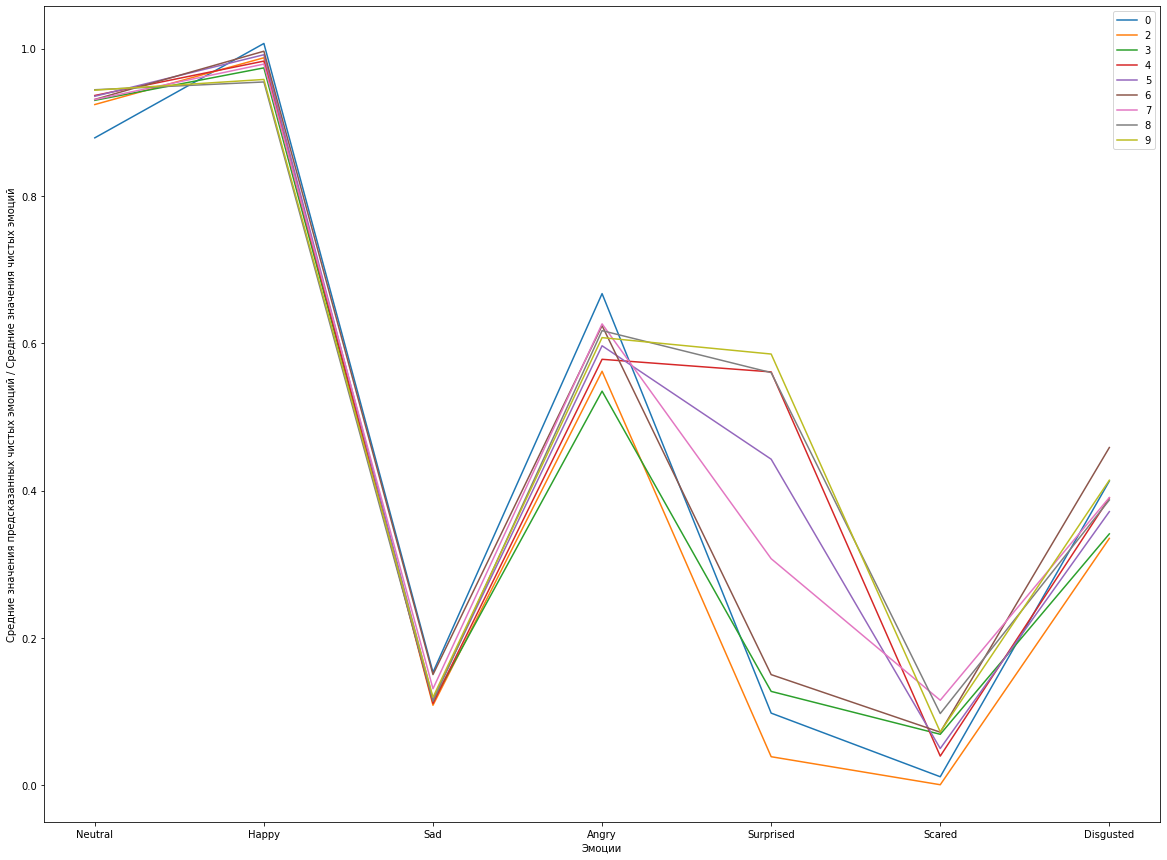

In [56]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [57]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.390050,0.514294
4,5,0.935337,0.991736,0.117371,0.596690,0.442711,0.050028,0.371550,0.500775
5,6,0.931045,0.996500,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.958160,0.119550,0.607741,0.585463,0.072540,0.414182,0.528750


In [74]:
# import matplotlib.pyplot as plt

# def plot_emotions_(models, df_clear, df_clear_metrics, scale=False, figsize=(20, 15)):
#     plt.figure(figsize=figsize)
#     for i, model_tuple in enumerate(models):
#         entry_dict = {'model': model_tuple[0]}
#         nn = model_tuple[2]
#         clear_metric, emotion_mean_values = nn.model_metric(df_clear, 'clear', scale=scale)
#         entry_dict.update({'clear': clear_metric})
#         for j, emotion in enumerate(df_clear.columns[:7]):
#             entry_dict.update({emotion: emotion_mean_values[j]})
        
#         plt.plot(seven_fields, emotion_mean_values, label=model_tuple[0])
#         # entry_dict.update({metric: df_metrics.iloc[i][metric] for metric in metrics})
#         df_clear_metrics = df_clear_metrics.append(entry_dict, ignore_index = True)
#     plt.xlabel("Эмоции")
#     plt.ylabel("Средние значения предсказанных чистых эмоций / Средние значения чистых эмоций")
#     plt.legend()
#     plt.show()
#     return df_clear_metrics

In [63]:
# df_clear_metrics.apply(lambda x: np.mean(x[seven_fields]), axis=1)

0    0.462507
1    0.404851
2    0.435794
3    0.500447
4    0.507399
5    0.509838
6    0.535854
7    0.549398
8    0.560925
dtype: float64

In [66]:
# models[-1][2].model_metric(df_clear, 'clear', scale=True)

(0.5609249285720681,
 [0.9379827457925548,
  0.957893107877423,
  0.11995800087455716,
  0.6154799544825161,
  0.6098177716332729,
  0.26273072934618186,
  0.42261218999797046])

In [277]:
# emotion = 'Scared'
# n = clear_count_dict[emotion]
# statistics_v2(models[0][2], df_clear.sort_values(emotion)[-n:], with_mean=True)

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.146661,0.030817,0.097125,0.001894,0.002959,0.002482,0.028064,0.042871,0.032967,0.161347,...,0.183676,0.048767,0.056002,0.053466,-0.547048,-0.477869,0.507533,0.028427,0.073582,0.049555


In [58]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [59]:
df_metrics['N'] = df_metrics['N'].apply(lambda x: int(x))

In [60]:
import matplotlib.pyplot as plt

In [61]:
metrics = tools.metrics.copy() + ['clear']

In [62]:
metrics

['mean', 'norm', 'stat', 'clear']

In [63]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics['N'])
    if metric == 'clear':
        y.append(df_clear_metrics[metric])
    else:
        y.append(df_metrics[metric])

In [64]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [65]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.390050,0.514294
4,5,0.935337,0.991736,0.117371,0.596690,0.442711,0.050028,0.371550,0.500775
5,6,0.931045,0.996500,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.958160,0.119550,0.607741,0.585463,0.072540,0.414182,0.528750


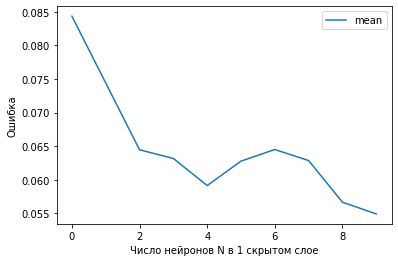

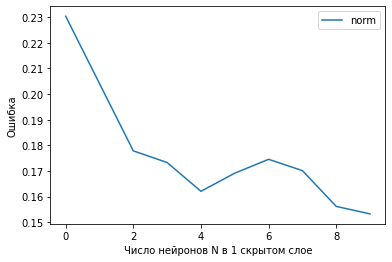

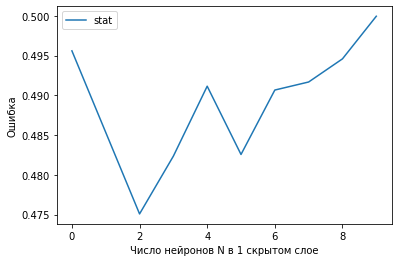

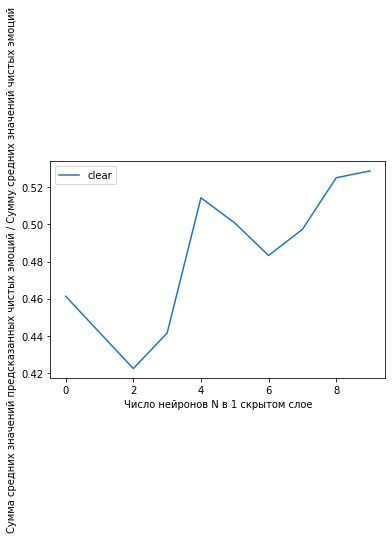

In [66]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    if metrics[i] == 'clear':
        plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
    else:
        plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [67]:
models

[['0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [172]:
# statistics_v2(models[-1][2], df_clear) # 9

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.310974,0.526172,-0.076664,0.055388,-0.847615,0.111615,-0.452202,0.547963,-0.636043,0.207614,-0.444373,0.029675,-0.621326,0.401345


In [84]:
models[-1][2].statistics(df_clear) # 9

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.291814,0.538687,-0.062539,0.065838,-0.839523,0.113978,-0.435471,0.605349,-0.728478,0.195025,-0.522352,0.052044,-0.655505,0.355617


In [173]:
# statistics_v2(models[-1][2], df_clear, with_mean=True) # 9

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.310974,0.526172,0.064556,-0.076664,0.055388,0.020046,-0.847615,0.111615,0.038811,-0.452202,...,0.084947,-0.636043,0.207614,0.029809,-0.444373,0.029675,0.010128,-0.621326,0.401345,0.074846


In [85]:
models[-1][2].statistics(df_clear, with_mean=True) # 9

,min_Neutral,max_Neutral,mean_abs_Neutral,min_Happy,max_Happy,mean_abs_Happy,min_Sad,max_Sad,mean_abs_Sad,min_Angry,...,mean_abs_Angry,min_Surprised,max_Surprised,mean_abs_Surprised,min_Scared,max_Scared,mean_abs_Scared,min_Disgusted,max_Disgusted,mean_abs_Disgusted
0,-0.291814,0.538687,0.065139,-0.062539,0.065838,0.025892,-0.839523,0.113978,0.040826,-0.435471,...,0.083963,-0.728478,0.195025,0.030454,-0.522352,0.052044,0.01785,-0.655505,0.355617,0.072945


In [123]:
# statistics_v2(models[-3][2], df_clear) # 7

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.313933,0.531795,-0.069168,0.06376,-0.836109,0.116133,-0.410572,0.577302,-0.816417,0.262167,-0.514351,0.041133,-0.584647,0.406114


In [180]:
# res_4 = statistics_v2(models[3][2], df_clear) # 4
# res_4

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.357518,0.462108,-0.048654,0.059517,-0.828337,0.128351,-0.466997,0.528474,-0.961162,0.056299,-0.532849,0.021063,-0.663613,0.33817


In [181]:
# res_5 = statistics_v2(models[4][2], df_clear) # 5
# res_5

,min_Neutral,max_Neutral,min_Happy,max_Happy,min_Sad,max_Sad,min_Angry,max_Angry,min_Surprised,max_Surprised,min_Scared,max_Scared,min_Disgusted,max_Disgusted
0,-0.329826,0.509112,-0.057815,0.056925,-0.813568,0.139335,-0.384835,0.645821,-0.878475,0.203451,-0.497857,0.07029,-0.638489,0.437992


In [191]:
# np.sum(np.absolute(res_4.values) - np.absolute(res_5.values)) / len(res_5.values[0])

-0.015048507068838392

In [99]:
# df_clear.sort_values('Surprised')[-20:]

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.800_Zaharova_5,0.12,0.01,0.0,0.0,0.94,0.0,0.0,0.01,0.82
00:00:03.400_Zaharova_5,0.07,0.00,0.0,0.0,0.95,0.0,0.0,0.00,0.63
00:00:03.500_Zaharova_5,0.05,0.00,0.0,0.0,0.96,0.0,0.0,0.00,0.64
00:00:06.700_Zaharova_5,0.08,0.01,0.0,0.0,0.97,0.0,0.0,0.00,0.83
00:00:03.800_Zaharova_5,0.04,0.00,0.0,0.0,0.97,0.0,0.0,0.00,0.65
00:00:06.100_Zaharova_5,0.04,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.87
00:00:04.000_Zaharova_5,0.03,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.69
00:00:04.600_Zaharova_5,0.04,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.84
00:00:06.400_Zaharova_5,0.05,0.00,0.0,0.0,0.98,0.0,0.0,0.00,0.85


In [107]:
# models[-1][2].predict(df_clear.sort_values('Surprised')).sort_values('Surprised') # 9

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:40.000_Куликов Алексей_1,0.103401,9.452761e-16,0.110125,0.477560,0.000003,0.007211,0.408525
00:00:40.300_Куликов Алексей_1,0.101401,9.619253e-16,0.108830,0.479597,0.000003,0.007458,0.407223
00:00:39.800_Куликов Алексей_1,0.109470,1.279732e-15,0.111615,0.472653,0.000003,0.007219,0.405443
00:00:40.500_Куликов Алексей_1,0.099435,9.788680e-16,0.107548,0.481634,0.000003,0.007714,0.405922
00:00:39.900_Куликов Алексей_1,0.107367,1.302272e-15,0.110305,0.474687,0.000003,0.007466,0.404143
...,...,...,...,...,...,...,...
00:00:06.000_Zaharova_5,0.275175,4.110998e-02,0.002943,0.000329,0.744804,0.015102,0.000720
00:00:05.700_Zaharova_5,0.265045,4.046524e-02,0.002880,0.000308,0.757517,0.015699,0.000712
00:00:05.300_Zaharova_5,0.255157,3.983024e-02,0.002819,0.000288,0.769792,0.016319,0.000704


In [109]:
# models[-1][2].get_diff(test).sort_values('Surprised')

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:08.900_Zaharova_5,0.134256,0.017606,0.000005,-0.000016,-0.773756,-0.002843,5.164065e-07
00:00:09.000_Zaharova_5,0.082009,0.052035,-0.000008,-0.000012,-0.771769,-0.002472,-4.735851e-06
00:00:09.100_Zaharova_5,0.038783,0.058028,-0.000009,-0.000010,-0.745978,-0.002168,-5.090242e-06
00:00:08.800_Zaharova_5,0.175756,-0.020934,0.000073,-0.000017,-0.724889,-0.003139,2.406507e-05
00:00:09.200_Zaharova_5,0.016276,0.057411,-0.000007,-0.000008,-0.719845,-0.002135,-5.369965e-06
...,...,...,...,...,...,...,...
00:00:03.600_Nasyrov_6,-0.333204,0.013882,-0.007592,-0.052148,0.587423,0.011480,5.990543e-04
00:00:03.500_Nasyrov_6,-0.296912,0.017072,-0.011422,-0.047159,0.609397,0.008586,6.263458e-04
00:00:03.200_Nasyrov_6,-0.200961,0.025215,-0.023259,-0.032764,0.615352,0.004493,7.218395e-04


In [93]:
# models[-3][2].predict(df_clear.sort_values('Surprised')[-20:]) # 7

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted
Index_,,,,,,,
00:00:06.800_Zaharova_5,0.345084,0.001939,0.000472,0.001220,0.287119,0.003743,0.000092
00:00:03.400_Zaharova_5,0.595017,0.004599,0.001603,0.003612,0.146086,0.004494,0.000365
00:00:03.500_Zaharova_5,0.581795,0.004327,0.001516,0.003440,0.151739,0.004468,0.000343
00:00:06.700_Zaharova_5,0.330207,0.001358,0.000521,0.001365,0.294540,0.003993,0.000105
00:00:03.800_Zaharova_5,0.568454,0.004072,0.001433,0.003277,0.157570,0.004441,0.000322
00:00:06.100_Zaharova_5,0.283809,0.001064,0.000416,0.001123,0.332923,0.003900,0.000082
00:00:04.000_Zaharova_5,0.514283,0.003191,0.001144,0.002698,0.182727,0.004338,0.000251
00:00:04.600_Zaharova_5,0.318246,0.001278,0.000492,0.001300,0.303894,0.003969,0.000099
00:00:06.400_Zaharova_5,0.306519,0.001202,0.000465,0.001238,0.313413,0.003946,0.000093


### Сохраняем все модели

In [68]:
dir_path = '../saved_models/first/_1'
for model_tuple in models:
    N = model_tuple[1]
    nn = model_tuple[2]
    save_name = f'model_first_{N}'
    path = os.path.join(dir_path, save_name)
    nn.model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_0/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_3/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_4/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_5/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_6/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_7/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_8/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_1/model_first_9/assets


### Дообучение

In [69]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [70]:
len(models)

9

In [99]:
# '22'.split('_')

['22']

In [71]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

,model,layer,N,mean,norm,stat


In [89]:
# v = 2
# for nn_tuple in models:
#     nn_list[0] = nn_list[0].split('_')[0] + f'_{v}'
#     nn = nn_tuple[2]
#     print('refit', nn_tuple[0])
#     df_train = nn.create_train_df_from_diff(test)
#     nn.fit(df_train, epochs=20, batch_size=20)
#     entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
#     entry_dict.update({metric: nn.model_metric(test, metric) for metric in tools.metrics})
#     df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     print(entry_dict)

refit 0
Epoch 1/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 2/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 3/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 4/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 5/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 6/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 7/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 8/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 9/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 10/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 11/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 12/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 13/20
286/2

234/234 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 19/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 20/20
234/234 [==============================] - 0s 1ms/step - loss: 0.0153
{'model': '9_2', 'layer': 'first', 'N': 9, 'mean': 0.07720053089756103, 'norm': 0.21137548927072805, 'stat': 0.4776668, 'clear': (0.4845936, [0.8169085, 0.8889814, 0.11247035, 0.53638005, 0.6203548, 0.037597835, 0.37946197])}


In [73]:
v = 2
df_metrics_2 = tools.refitting(models, test, df_metrics_2, v=v)

refit 0_2
Epoch 1/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 2/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0201
Epoch 3/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch 4/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 5/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 6/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0199
Epoch 7/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 8/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 9/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 10/20
286/286 [==============================] - 0s 1ms/step - loss: 0.0197
Epoch 11/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 12/20
286/286 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 13/20
286

Epoch 15/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 16/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 17/20
240/240 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 18/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 19/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 20/20
240/240 [==============================] - 0s 1ms/step - loss: 0.0152
{'model': '5_2', 'layer': 'first', 'N': 5, 'mean': 0.08108688017286611, 'norm': 0.21958055075509303, 'stat': 0.4640405}
refit 6_2
Epoch 1/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0169
Epoch 2/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0166
Epoch 3/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0164
Epoch 4/20
239/239 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 5/20
239/239 [==============================] - 

,model,layer,N,mean,norm,stat
0,0_2,first,0,0.096398,0.263710,0.485441
1,2_2,first,2,0.083028,0.222784,0.461403
2,3_2,first,3,0.085082,0.226568,0.464967
3,4_2,first,4,0.077502,0.213058,0.474124
4,5_2,first,5,0.081087,0.219581,0.464040
5,6_2,first,6,0.081384,0.219668,0.465280
6,7_2,first,7,0.081797,0.221435,0.465178
7,8_2,first,8,0.071896,0.199914,0.478278
8,9_2,first,9,0.068928,0.193882,0.480796


In [76]:
# str_ = log refitting - Забыл сохранить результат в df_metrics_2

In [77]:
# import json

# lines = [line for line in str_.split('\n') if line.startswith('{')]
# lines = [line.replace("'", '"') for line in lines]
# for line in lines:
#     df_metrics_2 = df_metrics_2.append(json.loads(line), ignore_index = True)

In [82]:
# df_metrics = df_metrics.drop('clear', 1)
df_metrics_2

,model,layer,N,mean,norm,stat
0,0_2,first,0,0.096398,0.263710,0.485441
1,2_2,first,2,0.083028,0.222784,0.461403
2,3_2,first,3,0.085082,0.226568,0.464967
3,4_2,first,4,0.077502,0.213058,0.474124
4,5_2,first,5,0.081087,0.219581,0.464041
5,6_2,first,6,0.081384,0.219668,0.465280
6,7_2,first,7,0.081797,0.221435,0.465178
7,8_2,first,8,0.071896,0.199914,0.478278
8,9_2,first,9,0.068928,0.193882,0.480796


In [83]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [97]:
# models # prev

[('0', 0, <nn_train.neural_network.NeuralNetwork at 0x7f1a9278bf40>),
 ('2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f1a81018f10>),
 ('3', 3, <nn_train.neural_network.NeuralNetwork at 0x7f1a81055ca0>),
 ('4', 4, <nn_train.neural_network.NeuralNetwork at 0x7f1a809a0820>),
 ('5', 5, <nn_train.neural_network.NeuralNetwork at 0x7f1a808ba760>),
 ('6', 6, <nn_train.neural_network.NeuralNetwork at 0x7f1a807fa370>),
 ('7', 7, <nn_train.neural_network.NeuralNetwork at 0x7f1a90124cd0>),
 ('8', 8, <nn_train.neural_network.NeuralNetwork at 0x7f1a80e95b20>),
 ('9', 9, <nn_train.neural_network.NeuralNetwork at 0x7f1a80ecab50>)]

In [103]:
# for i in range(len(models)):
#     models[i] = list(models[i])

In [84]:
models # cur

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [105]:
# for nn_tuple in models:
#     nn_tuple[0] = nn_tuple[0].split('_')[0] + f'_{v}'

In [85]:
models # should be

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

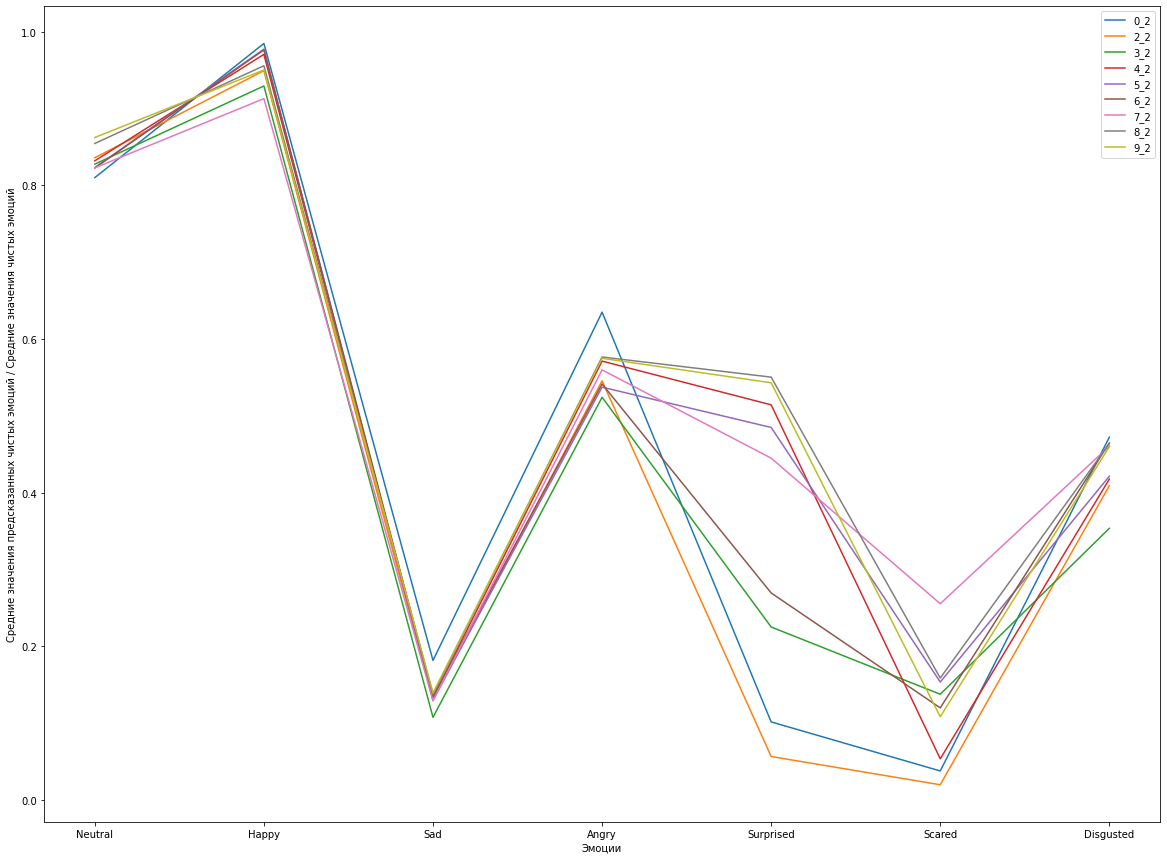

In [86]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [221]:
# df_metrics.iloc[-(n // v):]

In [99]:
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_2,0.810249,0.984909,0.181697,0.635112,0.101650,0.037817,0.472378,0.460545
1,2_2,0.836113,0.949520,0.129314,0.545680,0.056610,0.019870,0.409219,0.420904
2,3_2,0.827797,0.929571,0.107600,0.524330,0.225234,0.137651,0.353667,0.443693
3,4_2,0.832119,0.970714,0.133369,0.571355,0.514438,0.053630,0.417770,0.499056
4,5_2,0.823398,0.977518,0.130642,0.537472,0.485020,0.153596,0.421484,0.504161
5,6_2,0.822853,0.976534,0.134750,0.541614,0.269536,0.119921,0.464927,0.475734
6,7_2,0.823001,0.913093,0.129391,0.559961,0.445038,0.255517,0.460713,0.512387
7,8_2,0.854709,0.955880,0.137697,0.576740,0.550518,0.158739,0.464084,0.528338
8,9_2,0.862489,0.950373,0.139368,0.575016,0.543168,0.108403,0.459977,0.519828


In [87]:
metrics

['mean', 'norm', 'stat', 'clear']

In [93]:
# def create_metric_df_dict(metrics, df_metrics, df_clear_metrics):
#     metric_df_dict = {metric: df_metrics for metric in metrics[:-1]}
#     metric_df_dict.update({metrics[-1]: df_clear_metrics})
#     return metric_df_dict

In [95]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464041
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 'norm':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464041
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 '

In [ ]:
# metric_df_dict = {metric: df_metrics for metric in metrics[:-1]}
# metric_df_dict.update({metric[-1]: df_clear_metrics})
# df_ = metric_df_dict[metric]
# df_[metric]

#     for metric in metrics:
#         df_ = metric_df_dict[metric]
#         x.append(df_metrics['N'])
#         if metric == 'clear':
#             y.append(df_clear_metrics[metric])
#         else:
#             y.append(df_metrics[metric])

In [96]:
# {1:2}.keys()

dict_keys([1])

In [97]:
def plot_metrics(metric_df_dict, layer='first'):
    # dependencies
    mean_ = 'mean'
    clear = 'clear'
    
    x = []
    y = []
    
    df_metrics = metric_df_dict[mean_]
    metrics = list(metric_df_dict.keys())
    
    for metric in metrics:
        if layer == 'first':
            x.append(df_metrics['N'])
        else:
            x.append(df_metrics.index)
        df_ = metric_df_dict[metric]
        y.append(df_[metric])
    
    for i in range(len(metrics)):
        plt.plot(x[i], y[i], label=metrics[i])
        plt.xlabel("Число нейронов N в 1 скрытом слое")
        if metrics[i] == clear:
            plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
        else:
            plt.ylabel("Ошибка")
        plt.legend()
        plt.show()

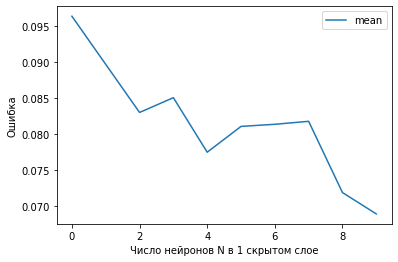

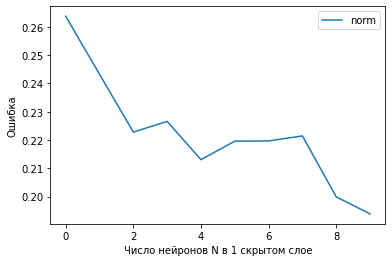

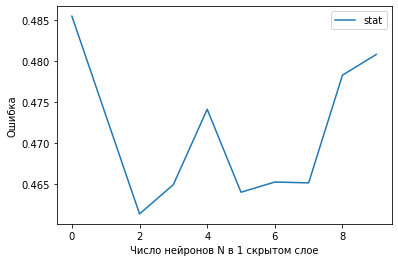

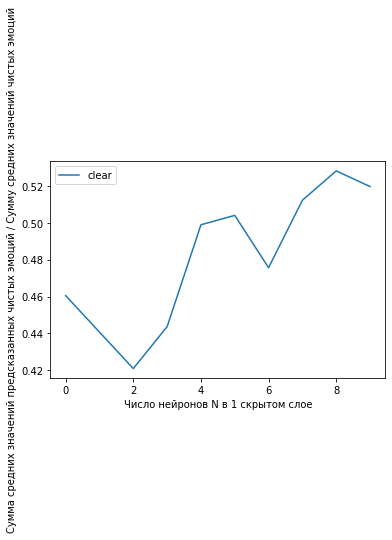

In [98]:
plot_metrics(metric_df_dict)

In [88]:
# x = []
# y = []
# for metric in metrics:
#     x.append(df_metrics['N'])
#     if metric == 'clear':
#         y.append(df_clear_metrics_2[metric])
#     else:
#         y.append(df_metrics[metric])

In [100]:
# for i in range(len(metrics)):
#     plt.plot(x[i], y[i], label=metrics[i])
#     plt.xlabel("Число нейронов N в 1 скрытом слое")
#     if metrics[i] == 'clear':
#         plt.ylabel("Сумма средних значений предсказанных чистых эмоций / Сумму средних значений чистых эмоций")
#     else:
#         plt.ylabel("Ошибка")
#     plt.legend()
#     plt.show()

In [190]:
# x = []
# y = []
# for metric in metrics:
#     x.append(df_metrics[-(n // v):]['N'])
#     y.append(df_metrics[-(n // v):][metric])

In [101]:
# for i in range(len(metrics)):
#     plt.plot(x[i], y[i], label=metrics[i])
#     plt.xlabel("Число нейронов N в 1 скрытом слое")
#     plt.ylabel("Ошибка")
#     plt.legend()
#     plt.show()

In [195]:
# dir_path = '../saved_models/first/'
# save_name = 'model_first_6_2'
# path = os.path.join(dir_path, save_name)
# path

'../saved_models/first/model_first_6_2'

In [197]:
# models[5]

('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>)

In [199]:
# models[5][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/model_first_6_2/assets


### Сохраняем все модели

In [103]:
def save_models(models, path_to_saved_models, layer='first', v=1):
    dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
    for model_list in models:
        N = model_list[1]
        nn = model_list[2]
        save_name = f'model_{layer}_{N}_{v}'
        path = os.path.join(dir_path, save_name)
        nn.model.save(path)

In [104]:
models

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [105]:
v

2

In [109]:
path_to_saved_models = '../saved_models/'
layer = 'first'

In [110]:
save_models(models, path_to_saved_models, layer, v=v)

INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_0_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_2_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_3_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_4_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_5_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_6_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_7_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_8_2/assets
INFO:tensorflow:Assets written to: ../saved_models/first/_2/model_first_9_2/assets


In [102]:
models

[['0_2', 0, <nn_train.neural_network.NeuralNetwork at 0x7f406affd340>],
 ['2_2', 2, <nn_train.neural_network.NeuralNetwork at 0x7f4068704a00>],
 ['3_2', 3, <nn_train.neural_network.NeuralNetwork at 0x7f40505fd0a0>],
 ['4_2', 4, <nn_train.neural_network.NeuralNetwork at 0x7f405053c700>],
 ['5_2', 5, <nn_train.neural_network.NeuralNetwork at 0x7f4031f7dca0>],
 ['6_2', 6, <nn_train.neural_network.NeuralNetwork at 0x7f4050064a60>],
 ['7_2', 7, <nn_train.neural_network.NeuralNetwork at 0x7f4050619340>],
 ['8_2', 8, <nn_train.neural_network.NeuralNetwork at 0x7f40506f2670>],
 ['9_2', 9, <nn_train.neural_network.NeuralNetwork at 0x7f405016e7f0>]]

In [200]:
full_df_list

[                                  Neutral  Happy   Sad  Angry  Surprised  \
 Index_                                                                     
 00:01:40.700_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:00:00.100_Zaharova_10             0.99   0.00  0.00   0.00       0.01   
 00:01:37.900_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
 00:01:36.300_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   
 00:00:09.696_Боим_1                  0.99   0.00  0.01   0.01       0.01   
 ...                                   ...    ...   ...    ...        ...   
 00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
 00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
 00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
 00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

In [201]:
percent_df_list

[                             Neutral  Happy  Sad  Angry  Surprised  Scared  \
 Index_                                                                       
 00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
 ...                              ...    ...  ...    ...        ...     ...   
 00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
 00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
 00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
 00:00:13.100_Aleksashina_1      0.02   0.97  0.0   

In [202]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.272_Korsakov_9,0.98,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.32
00:01:46.900_Турчина Екатерина_1,0.98,0.00,0.02,0.01,0.02,0.0,0.00,-0.02,0.21
00:01:13.000_Куликов Алексей_1,0.53,0.01,0.22,0.01,0.02,0.0,0.00,-0.21,0.55
00:01:26.900_Бондаренко Денис_2,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:02.000_Боим_3,0.75,0.00,0.08,0.07,0.01,0.0,0.06,-0.13,0.18
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [203]:
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [ ]:
df_metrics_4 = refitting(models_4, test, df_metrics_4, v=v, layer='third')

In [121]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

,model,layer,N,mean,norm,stat,clear


In [122]:
df_train_, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train_

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:29.400_Балакин Владислав_1,0.99,0.00,0.00,0.00,0.01,0.0,0.00,0.00,0.25
00:00:08.600_Provotorov_3,0.94,0.00,0.05,0.05,0.00,0.0,0.01,-0.09,0.25
00:00:10.878_Керов Андрей_3,0.95,0.01,0.01,0.03,0.01,0.0,0.01,-0.03,0.30
00:00:07.000_Korsakov_4,0.47,0.00,0.03,0.42,0.00,0.0,0.03,-0.44,0.52
00:00:06.500_Боим_10,0.96,0.01,0.00,0.00,0.05,0.0,0.00,-0.00,0.37
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [123]:
v = 3
df_metrics_3 = tools.refitting(models, test, df_metrics_3, df_train=df_train_, v=v, type_='split')

refit 0_2
Epoch 1/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0121
Epoch 2/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0118
Epoch 3/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 4/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 5/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0116
Epoch 6/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0115
Epoch 7/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 8/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 9/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0114
Epoch 10/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 11/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 12/20
916/916 [==============================] - 1s 1ms/step - loss: 0.0113
Epoch 13/20
916

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [205]:
v = 3
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=10, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0142
Epoch 2/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 3/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 4/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 5/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 6/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 7/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 8/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 9/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
Epoch 10/10
916/916 [==============================] - 3s 3ms/step - loss: 0.0141
{'model': '0_3', 'layer': 'first', 'N': 0, 'mean': 0.09639325921242672, 'norm': 0.24882436340872563, 'stat': 0.35409793}
refit 2
Epoch 1/10
916/916 [==============================] 

In [206]:
n = len(df_metrics)

In [207]:
df_metrics[-(n // v):]

,model,layer,N,mean,norm,stat
18,0_3,first,0,0.096393,0.248824,0.354098
19,2_3,first,2,0.065503,0.177585,0.325443
20,3_3,first,3,0.059869,0.165338,0.343472
21,4_3,first,4,0.061721,0.167130,0.353361
22,5_3,first,5,0.058628,0.163083,0.350972
23,6_3,first,6,0.055124,0.155587,0.358797
24,7_3,first,7,0.058770,0.162693,0.356677
25,8_3,first,8,0.054359,0.153213,0.367691
26,9_3,first,9,0.054602,0.153330,0.355644


In [208]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // v):]['N'])
    y.append(df_metrics[-(n // v):][metric])

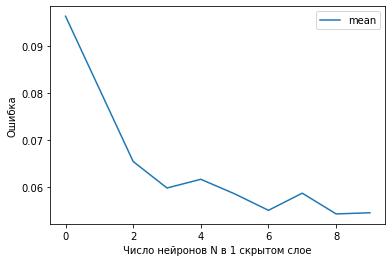

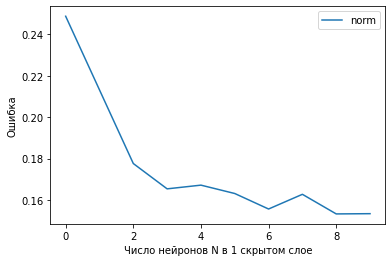

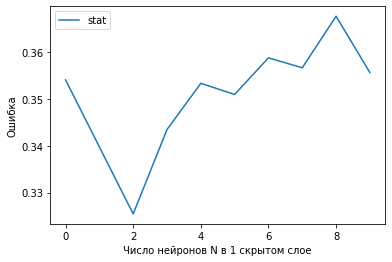

In [209]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [210]:
import os

In [212]:
df_metrics[-(n // v):].loc[26:]

,model,layer,N,mean,norm,stat
26,9_3,first,9,0.054602,0.15333,0.355644


In [213]:
dir_path = '../saved_models/first/'
save_name = 'model_first_9_3'
path = os.path.join(dir_path, save_name)
path

'../saved_models/first/model_first_9_3'

In [214]:
models

[('0', 0, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbd585954f0>),
 ('2', 2, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71d868e0>),
 ('3', 3, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71e76100>),
 ('4', 4, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc71dd23d0>),
 ('5', 5, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99c55dc0>),
 ('6', 6, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc72210f10>),
 ('7', 7, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99b112b0>),
 ('8', 8, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99bcc3a0>),
 ('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99ebd040>)]

In [215]:
models[-1]

('9', 9, <NeuralNetwork.neural_network.NeuralNetwork at 0x7fbc99ebd040>)

In [216]:
models[-1][2].model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/first/model_first_9_3/assets


In [222]:
v = 4
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    df_train = nn.create_train_df_from_diff(test)
    nn.fit(df_train, epochs=10, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 2/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 3/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 4/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 5/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 6/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 7/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0217
Epoch 8/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 9/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 10/10
302/302 [==============================] - 1s 2ms/step - loss: 0.0216
{'model': '0_4', 'layer': 'first', 'N': 0, 'mean': 0.1220054257794208, 'norm': 0.3147487545817099, 'stat': 0.34006542}
refit 2
Epoch 1/10
270/270 [==============================] - 

In [223]:
n = len(df_metrics)

In [229]:
df_metrics[-(n // (v+1)):] # Случайно обучил дважды

,model,layer,N,mean,norm,stat
36,0_4,first,0,0.122005,0.314749,0.340065
37,2_4,first,2,0.074245,0.197716,0.318367
38,3_4,first,3,0.066076,0.183862,0.335611
39,4_4,first,4,0.067738,0.184507,0.341676
40,5_4,first,5,0.067006,0.184240,0.345066
41,6_4,first,6,0.060189,0.171205,0.352513
42,7_4,first,7,0.065399,0.179800,0.348276
43,8_4,first,8,0.057785,0.163359,0.361056
44,9_4,first,9,0.057131,0.160471,0.352185


In [230]:
x = []
y = []
for metric in metrics:
    x.append(df_metrics[-(n // (v+1)):]['N'])
    y.append(df_metrics[-(n // (v+1)):][metric])

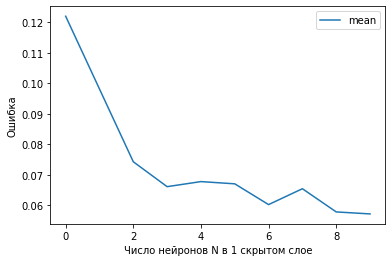

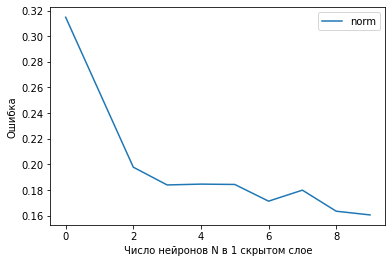

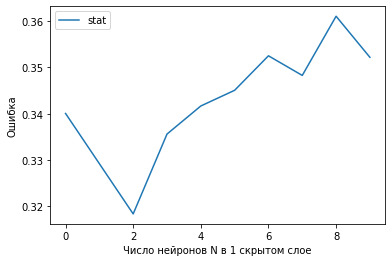

In [231]:
for i in range(len(metrics)):
    plt.plot(x[i], y[i], label=metrics[i])
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

In [232]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list)
df_train

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:06.272_Korsakov_9,0.98,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.32
00:01:46.900_Турчина Екатерина_1,0.98,0.00,0.02,0.01,0.02,0.0,0.00,-0.02,0.21
00:01:13.000_Куликов Алексей_1,0.53,0.01,0.22,0.01,0.02,0.0,0.00,-0.21,0.55
00:01:26.900_Бондаренко Денис_2,0.19,0.70,0.00,0.00,0.00,0.0,0.00,0.70,0.49
00:00:02.000_Боим_3,0.75,0.00,0.08,0.07,0.01,0.0,0.06,-0.13,0.18
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [389]:
v = 5
for nn_tuple in models:
    nn = nn_tuple[2]
    print('refit', nn_tuple[0])
    nn.fit(df_train, epochs=5, batch_size=20)
    entry_dict = {'model': str(nn_tuple[1]) + f'_{v}', 'layer': 'first', 'N': nn_tuple[1]}
    entry_dict.update({metric: nn.model_metric(test, metric) for metric in metrics})
    df_metrics = df_metrics.append(entry_dict, ignore_index = True)
    print(entry_dict)

refit 0
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 2ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
{'model': '0_5', 'layer': 'first', 'N': 0, 'mean': 0.09712630229637173, 'norm': 0.2506625007648664, 'stat': 0.3543298}
refit 2
Epoch 1/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 2/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0142
Epoch 3/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 4/5
916/916 [==============================] - 1s 1ms/step - loss: 0.0141
Epoch 5/5
916/916 [==============================] - 2s 2ms/step - loss: 0.0141
{'model': '2_5', 'layer': 'first', 'N': 2, 'mean': 0.097165067938

In [390]:
n = len(df_metrics)

In [402]:
metrics

['mean', 'norm', 'stat']

In [396]:
x = [[] for _ in range(len(metrics))]
y = [[] for _ in range(len(metrics))]

In [399]:
for i, metric in enumerate(metrics):
    x[i].append(df_metrics[4 * (n // v):]['N'])
    y[i].append(df_metrics[4 * (n // v):][metric])

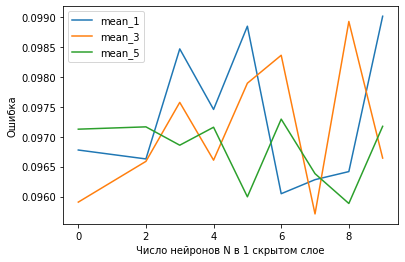

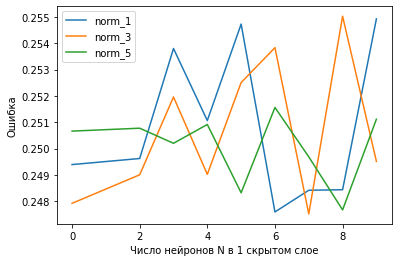

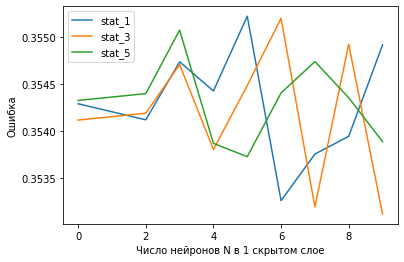

In [401]:
for i in range(len(metrics)):
    for j in range(len(x[i])):
        plt.plot(x[i][j], y[i][j], label=metrics[i] + f'_{j * 2 + 1}')
    plt.xlabel("Число нейронов N в 1 скрытом слое")
    plt.ylabel("Ошибка")
    plt.legend()
    plt.show()

### Сохраним результаты метрик 

In [405]:
res_metrics_df = df_metrics[df_metrics.model == '7_3']
res_metrics_df

,model,layer,N,mean,norm,stat
24,7_3,first,7,0.09571,0.247515,0.353197


In [413]:
name_db = 'model_metrics'
db_path = f'../Data/databases/{name_db}.db'

In [414]:
db_path

'../Data/databases/model_metrics.db'

In [415]:
save_to_db(db_path, name_db, res_metrics_df)

In [416]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,7_3,first,7,0.0957098467287175,0.247515327140797,0.353197246789932


### Разработка функции apply_float() для NN.tools модуля

In [71]:
def apply_float(df_, columns):
    for field in columns:
        df_[field] = df_[field].apply(lambda el: float(el))

### Использование функции apply_float()

In [72]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [77]:
apply_float(df, fields)

In [78]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [79]:
df['Neutral']

0        0.987859
1        0.987882
2        0.987905
3        0.987929
4        0.988026
           ...   
20842    0.931563
20843    0.935643
20844    0.938411
20845    0.940782
20846    0.942106
Name: Neutral, Length: 25321, dtype: float64

In [80]:
df['Action_Unit_12___Right___Lip_Corner_Puller']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20842    0.0
20843    0.0
20844    0.0
20845    0.0
20846    0.0
Name: Action_Unit_12___Right___Lip_Corner_Puller, Length: 25321, dtype: object

### Разработка функции make_valid_df() для NN.tools модуля

In [17]:
def make_valid_df(df_, columns=None):
    if columns is not None:
        apply_float(df_, columns)
    df_.index = df_['Index_']

In [82]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
0,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
1,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
2,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
4,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20842,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20843,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20844,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
20845,00:01:52.000_Куликов Алексей_1,00:01:52.000,0.940782,0.000023,0.023035,0.056517,0.019016,0.000197,0.000878,-0.056494,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [84]:
make_valid_df(df, fields)

In [85]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
